In [1]:
import re
import os
import pandas as pd
from collections import defaultdict

bg_file = "/home2/s439906/project/CASP16/oligomer/3_stoichiometry/stoich_bg_distribution.csv"


In [2]:
# 创建 DataFrame
df_corrected = pd.read_csv(bg_file)

# 添加链的数量列
df_corrected['chain_count'] = df_corrected['stoichiometry'].apply(lambda x: len(x.split(',')))

# 使用正则表达式提取并按降序排列数字部分
def extract_and_sort_numbers(stoichiometry):
    numbers = [int(num) for num in re.findall(r'\d+', stoichiometry)]
    sorted_numbers = sorted(numbers, reverse=True)
    return tuple(sorted_numbers)

# 应用该函数以创建新列 'sorted_numbers'
df_corrected['sorted_numbers'] = df_corrected['stoichiometry'].apply(extract_and_sort_numbers)

# 显示处理后的 DataFrame
# import ace_tools as tools; tools.display_dataframe_to_user(name="Stoichiometry with Sorted Numbers (Final)", dataframe=df_corrected)

df_corrected

stoichiometry   count  chain_count  \
0                                                    A1  144915            1   
1                                                    A2   75193            1   
2                                                A1, B1   28012            2   
3                                                    A4   18330            1   
4                                            A1, B1, C1    9653            3   
...                                                 ...     ...          ...   
3607                                       A22, B12, C2       1            3   
3608  A8, B4, C4, D2, E2, F2, G2, H2, I2, J2, K2, L2...       1           16   
3609  A16, B4, C2, D2, E2, F2, G2, H2, I2, J2, K2, L...       1           27   
3610  A22, B6, C6, D4, E3, F2, G2, H2, I2, J2, K2, L...       1           20   
3611         A9, B2, C2, D1, E1, F1, G1, H1, I1, J1, K1       1           11   

                                         sorted_numbers  
0                                                  (1,)  
1                                                  (2,)  
2                                                (1, 1)  
3                                                  (4,)  
4                                             (1, 1, 1)  
...                                                 ...  
3607                                        (22, 12, 2)  
3608   (8, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1)  
3609  (16, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,...  
3610  (22, 6, 6, 4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,...  
3611                  (9, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1)  

[3612 rows x 4 columns]

In [3]:
# 按 chain_count 分组数据
unique_chain_counts = {chain_count: df_corrected[df_corrected['chain_count'] == chain_count] 
                       for chain_count in df_corrected['chain_count'].unique()}
unique_chain_counts

{1:      stoichiometry   count  chain_count sorted_numbers
 0               A1  144915            1           (1,)
 1               A2   75193            1           (2,)
 3               A4   18330            1           (4,)
 5               A3    9450            1           (3,)
 7               A6    5684            1           (6,)
 ...            ...     ...          ...            ...
 3498          A340       1            1         (340,)
 3540            F4       1            1           (4,)
 3595            U2       1            1           (2,)
 3596            W2       1            1           (2,)
 3597            X2       1            1           (2,)
 
 [434 rows x 4 columns],
 2:      stoichiometry  count  chain_count sorted_numbers
 2           A1, B1  28012            2         (1, 1)
 6           A2, B2   6795            2         (2, 2)
 8           A2, B1   4426            2         (2, 1)
 12          A3, B3   1809            2         (3, 3)
 17          A4, B4 

In [107]:
# 初始化字典来存储结果
chain_count_analysis = defaultdict(dict)

# 对每个 chain_count 分组，然后对 sorted_numbers 聚合
for chain_count, group in df_corrected.groupby('chain_count'):
    # 计算每种 unique sorted_numbers 的总和
    sorted_number_counts = group.groupby('sorted_numbers')['count'].sum()
    chain_count_analysis[chain_count] = sorted_number_counts.to_dict()
chain_count_analysis

defaultdict(dict,
            {1: {(1,): 144915,
              (2,): 77259,
              (3,): 9667,
              (4,): 18480,
              (5,): 1858,
              (6,): 5736,
              (7,): 486,
              (8,): 1870,
              (9,): 166,
              (10,): 874,
              (11,): 106,
              (12,): 1237,
              (13,): 23,
              (14,): 314,
              (15,): 53,
              (16,): 213,
              (17,): 18,
              (18,): 127,
              (19,): 26,
              (20,): 67,
              (21,): 24,
              (22,): 26,
              (23,): 14,
              (24,): 925,
              (25,): 8,
              (26,): 11,
              (27,): 7,
              (28,): 372,
              (29,): 11,
              (30,): 24,
              (31,): 2,
              (32,): 20,
              (33,): 11,
              (34,): 23,
              (35,): 25,
              (36,): 20,
              (37,): 5,
              (38,): 3,
              

In [108]:
chain_count_analysis = defaultdict(dict)
# 对每个 chain_count 分组
for chain_count, group in df_corrected.groupby('chain_count'):
    # 计算每种 unique sorted_numbers 的计数总和
    sorted_number_counts = group.groupby('sorted_numbers')['count'].sum()
    
    # 计算标准化比例
    total_count = sorted_number_counts.sum()
    normalized_counts = (sorted_number_counts / total_count).to_dict()
    
    chain_count_analysis[chain_count] = normalized_counts

chain_count_analysis

defaultdict(dict,
            {1: {(1,): 0.5446089668909015,
              (2,): 0.2903491299936112,
              (3,): 0.03632981322109061,
              (4,): 0.069450186027284,
              (5,): 0.006982599872223684,
              (6,): 0.021556616182494645,
              (7,): 0.0018264496974707805,
              (8,): 0.007027697395618024,
              (9,): 0.0006238490736217069,
              (10,): 0.0032846029538877823,
              (11,): 0.00039836145665000564,
              (12,): 0.004648803036566575,
              (13,): 8.643691983915216e-05,
              (14,): 0.0011800518621519036,
              (15,): 0.00019918072832500282,
              (16,): 0.0008004810402495396,
              (17,): 6.764628509151039e-05,
              (18,): 0.0004772821225901011,
              (19,): 9.771130068773723e-05,
              (20,): 0.0002517945056183998,
              (21,): 9.019504678868053e-05,
              (22,): 9.771130068773723e-05,
              (23,): 5.26137772933

In [109]:
stoichiometry_dir = "/data/data1/conglab/jzhan6/CASP16/CASP16_scores/oligo_20240910/firstmodels/"
stoichiometry_files = [file for file in os.listdir(stoichiometry_dir) if file.endswith('.stoichiometry')]
stoichiometry_files.__len__()

28

In [110]:
def count_unique_chains(stoichiometry):
    # 提取所有字母（代表链的种类），并计算唯一字母的数量
    unique_chains = set(char for char in stoichiometry if char.isalpha())
    return len(unique_chains)

In [111]:
score_df_all = None
for file in stoichiometry_files:
    target = file.split('.')[0]
    df = pd.read_csv(os.path.join(stoichiometry_dir, file), sep='\t')
    df['group_number'] = df['model'].apply(lambda x: re.search(r'TS\d{3}', x).group(0) if re.search(r'TS\d{3}', x) else None)
    df['sorted_numbers'] = df['truth'].apply(extract_and_sort_numbers)
    df['chain_count'] = df['truth'].apply(count_unique_chains)
    first_sorted_numbers = df['sorted_numbers'].iloc[0]
    first_chain_count = df['chain_count'].iloc[0]
    bg_prob = chain_count_analysis[first_chain_count][first_sorted_numbers]
    score = 1 - bg_prob # if the probability is low, then the score awarded should be high
    df['score'] = df['match_status'].apply(
        lambda x: score if x == "yes" else 0
    )

    score_df = df[['group_number', 'score']]
    score_df.set_index('group_number', inplace=True)
    # rename the column to the target name
    score_df.columns = [target]

    if score_df_all is None:
        score_df_all = score_df
    else:
        score_df_all = pd.concat([score_df_all, score_df], axis=1)


df
score_df
score_df_all

T0237o     H0229     H0215  H0265    H0223     H0232     H0230  \
TS022  0.93055  0.000000  0.409677    0.0  0.47751  0.855264  0.000000   
TS052  0.93055  0.000000  0.409677    0.0  0.47751  0.855264  0.000000   
TS456  0.93055  0.000000  0.409677    0.0  0.47751  0.855264  0.000000   
TS264  0.93055  0.000000  0.409677    0.0  0.47751  0.855264  0.000000   
TS148  0.93055  0.000000  0.409677    0.0  0.47751  0.855264  0.000000   
...        ...       ...       ...    ...      ...       ...       ...   
TS261      NaN  0.409677  0.409677    0.0  0.47751  0.000000  0.409677   
TS023      NaN  0.409677  0.409677    0.0  0.47751       NaN  0.409677   
TS468      NaN       NaN  0.000000    0.0      NaN       NaN       NaN   
TS197      NaN       NaN  0.409677    NaN      NaN       NaN       NaN   
TS400      NaN       NaN  0.409677    NaN      NaN       NaN       NaN   

          H0245    T0235o  H0267  ...    H0225  H0244   T0259o     H0227  \
TS022  0.409677  0.000000    0.0  ...  0.47751    0.0  0.96367  0.000000   
TS052  0.409677       NaN    0.0  ...  0.47751    0.0  0.96367  0.000000   
TS456  0.409677       NaN    0.0  ...  0.47751    0.0  0.96367  0.000000   
TS264  0.409677  0.978443    0.0  ...  0.47751    0.0  0.96367  0.995954   
TS148  0.409677  0.978443    0.0  ...  0.47751    0.0  0.96367  0.995954   
...         ...       ...    ...  ...      ...    ...      ...       ...   
TS261  0.409677       NaN    0.0  ...  0.47751    0.0      NaN  0.000000   
TS023  0.409677       NaN    NaN  ...  0.47751    NaN      NaN       NaN   
TS468  0.409677       NaN    NaN  ...  0.47751    0.0      NaN       NaN   
TS197       NaN       NaN    NaN  ...      NaN    NaN      NaN       NaN   
TS400       NaN       NaN    NaN  ...      NaN    NaN      NaN       NaN   

          H0233   T0240o     H0236    H0222     H0258   T0257o  
TS022  0.932341  0.96367  0.000000  0.47751  0.906727  0.96367  
TS052  0.932341  0.96367  0.000000  0.47751  0.906727  0.96367  
TS456  0.932341  0.96367  0.000000  0.47751  0.906727  0.96367  
TS264  0.000000  0.96367  0.992835  0.47751  0.000000  0.96367  
TS148  0.000000  0.96367  0.992835  0.47751  0.000000  0.96367  
...         ...      ...       ...      ...       ...      ...  
TS261  0.000000  0.96367  0.000000  0.47751  0.000000      NaN  
TS023  0.000000      NaN  0.000000  0.47751       NaN      NaN  
TS468       NaN      NaN       NaN      NaN       NaN      NaN  
TS197       NaN      NaN       NaN      NaN       NaN      NaN  
TS400       NaN      NaN       NaN      NaN       NaN      NaN  

[67 rows x 28 columns]

In [112]:
mask = score_df_all.isna()
# sort columns alphabetically
score_df_all = score_df_all.reindex(sorted(score_df_all.columns), axis=1)
# impute missing values with 0
score_df_all.fillna(0, inplace=True)
# sum the scores for each row
score_df_all['total_score'] = score_df_all.sum(axis=1)
# sort the dataframe by total_score
score_df_all.sort_values('total_score', ascending=False, inplace=True)
score_df_all

H0208     H0215     H0217     H0220    H0222    H0223    H0225  \
TS322  0.409677  0.409677  0.958564  0.993762  0.47751  0.47751  0.47751   
TS425  0.000000  0.409677  0.000000  0.993762  0.47751  0.47751  0.47751   
TS051  0.000000  0.409677  0.000000  0.993762  0.47751  0.47751  0.47751   
TS331  0.000000  0.409677  0.000000  0.993762  0.47751  0.47751  0.47751   
TS147  0.000000  0.409677  0.958564  0.993762  0.47751  0.47751  0.47751   
...         ...       ...       ...       ...      ...      ...      ...   
TS300  0.000000  0.000000  0.000000  0.000000  0.47751  0.47751  0.47751   
TS468  0.000000  0.000000  0.000000  0.000000  0.00000  0.00000  0.47751   
TS276  0.000000  0.000000  0.000000  0.000000  0.00000  0.00000  0.00000   
TS400  0.409677  0.409677  0.000000  0.000000  0.00000  0.00000  0.00000   
TS197  0.000000  0.409677  0.000000  0.000000  0.00000  0.00000  0.00000   

          H0227     H0229     H0230  ...    T0206o    T0218o   T0234o  \
TS322  0.995954  0.000000  0.000000  ...  0.709651  0.000000  0.96367   
TS425  0.995954  0.000000  0.000000  ...  0.709651  0.709651  0.96367   
TS051  0.995954  0.000000  0.000000  ...  0.709651  0.709651  0.96367   
TS331  0.995954  0.000000  0.000000  ...  0.709651  0.709651  0.96367   
TS147  0.995954  0.000000  0.000000  ...  0.709651  0.000000  0.96367   
...         ...       ...       ...  ...       ...       ...      ...   
TS300  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.00000   
TS468  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.00000   
TS276  0.000000  0.409677  0.409677  ...  0.000000  0.000000  0.00000   
TS400  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.00000   
TS197  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.00000   

         T0235o   T0237o   T0240o   T0257o   T0259o    T0270o  total_score  
TS322  0.978443  0.93055  0.96367  0.96367  0.96367  0.000000    16.630523  
TS425  0.978443  0.93055  0.96367  0.96367  0.96367  0.978443    15.957541  
TS051  0.978443  0.93055  0.96367  0.96367  0.96367  0.978443    15.957541  
TS331  0.978443  0.93055  0.96367  0.96367  0.96367  0.978443    15.957541  
TS147  0.978443  0.93055  0.96367  0.96367  0.96367  0.000000    15.314119  
...         ...      ...      ...      ...      ...       ...          ...  
TS300  0.000000  0.00000  0.00000  0.00000  0.96367  0.000000     2.396201  
TS468  0.000000  0.00000  0.00000  0.00000  0.00000  0.000000     0.887187  
TS276  0.000000  0.00000  0.00000  0.00000  0.00000  0.000000     0.819354  
TS400  0.000000  0.00000  0.00000  0.00000  0.00000  0.000000     0.819354  
TS197  0.000000  0.00000  0.00000  0.00000  0.00000  0.000000     0.409677  

[67 rows x 29 columns]

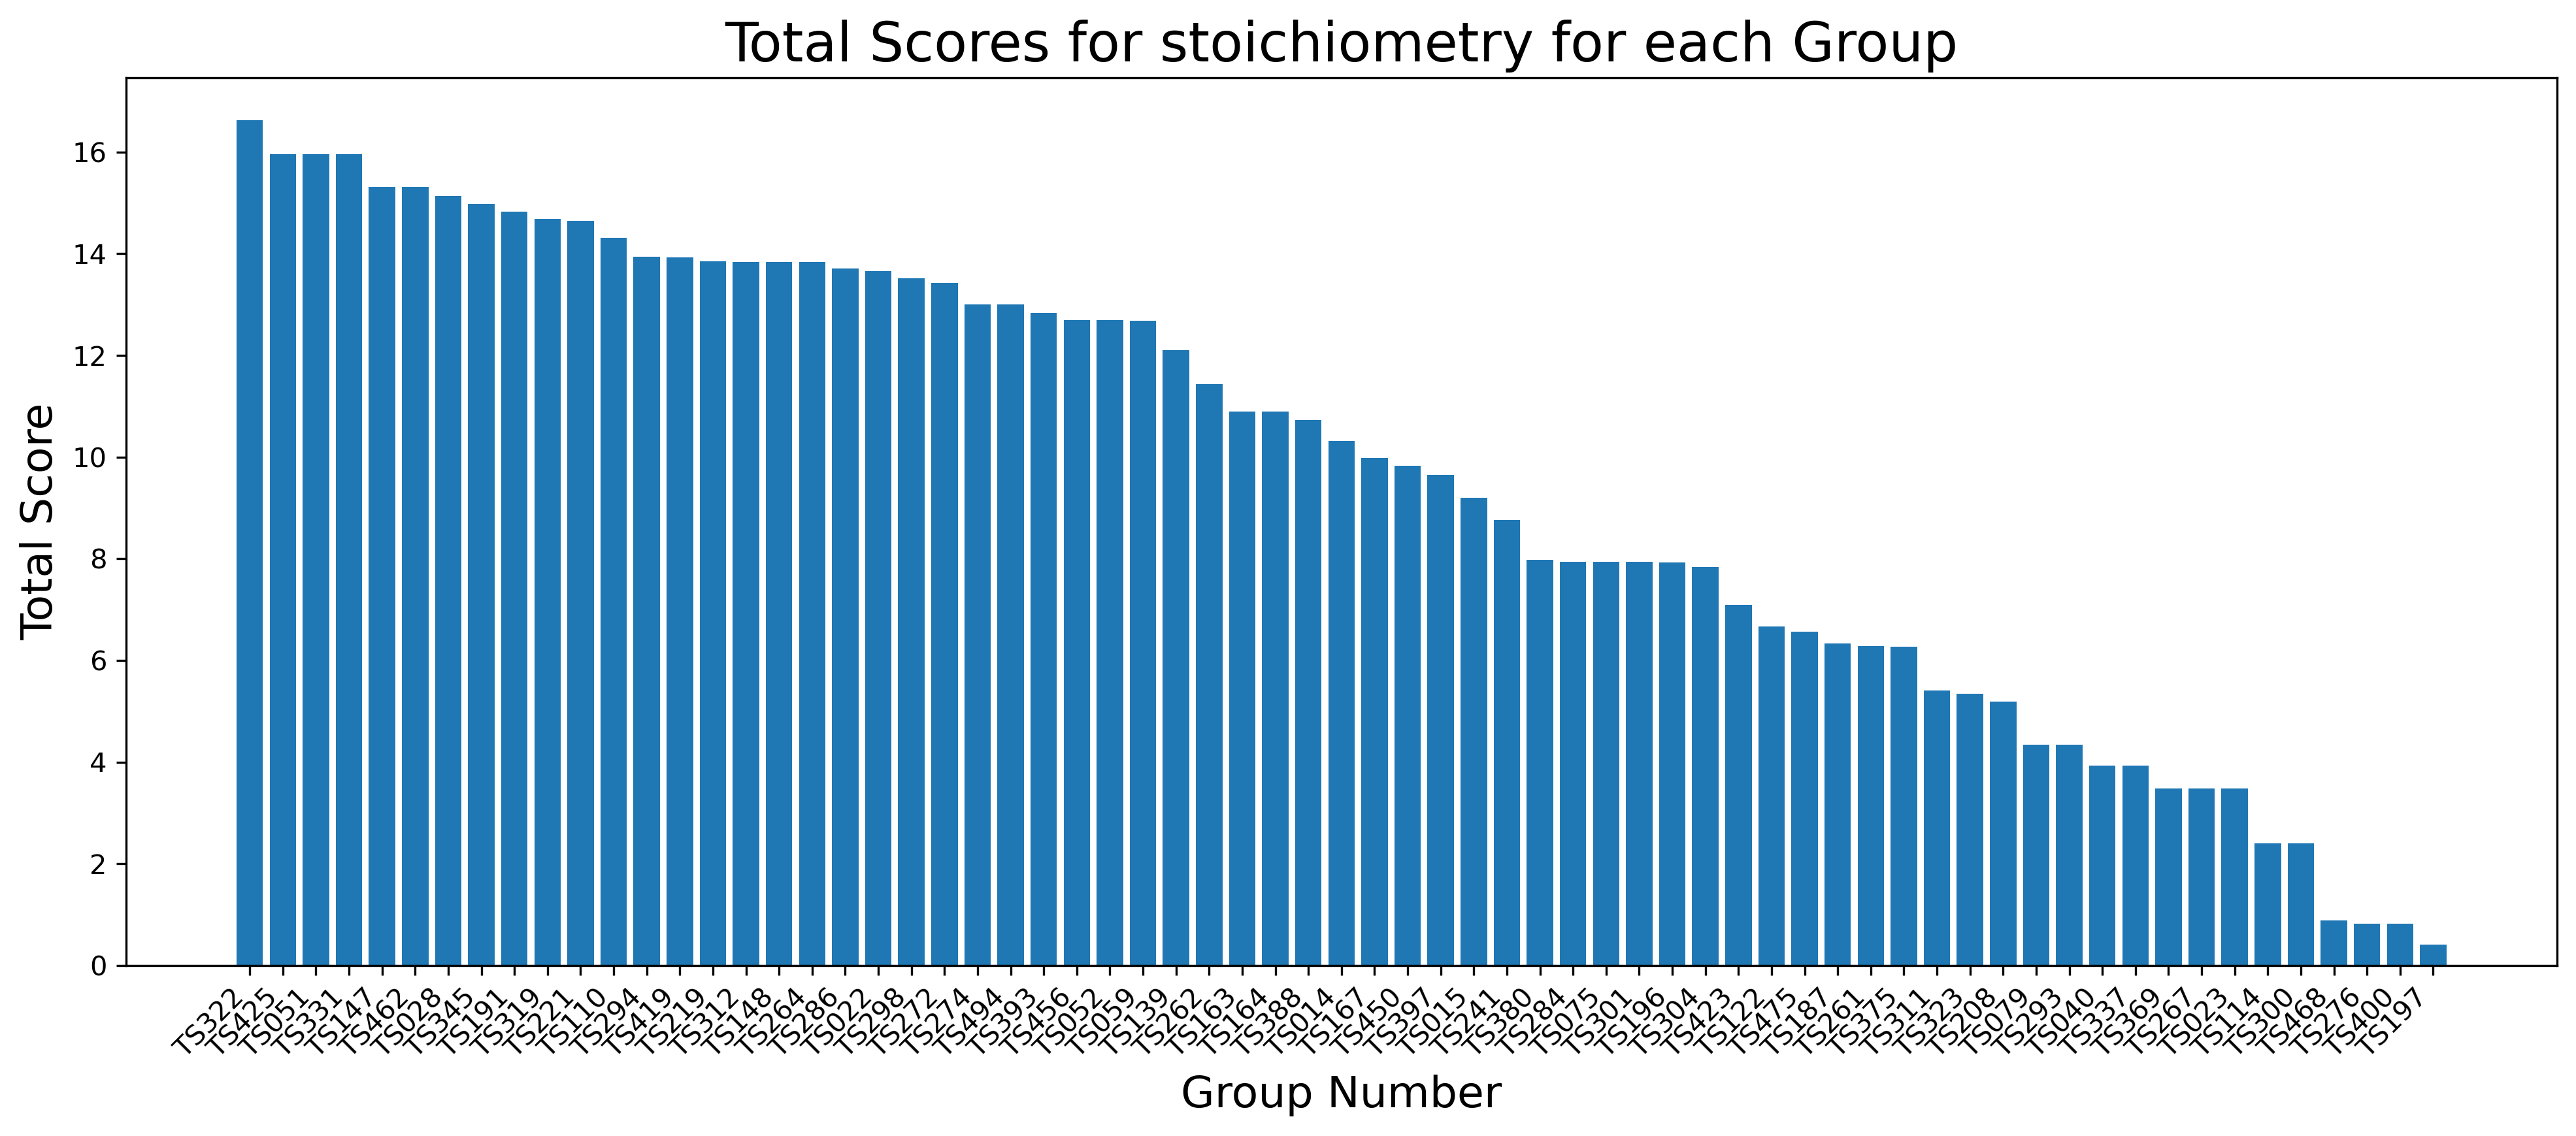

In [116]:
# plot the total scores as bar plot
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6), dpi=300)
plt.bar(score_df_all.index, score_df_all['total_score'])
plt.xlabel('Group Number', fontsize=16)
plt.ylabel('Total Score', fontsize=16)
# rotate the x-axis labels by 90 degrees
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.yticks(fontsize=10)
plt.title('Total Scores for stoichiometry for each Group', fontsize=20)
plt.show()



In [102]:
import seaborn as sns
from matplotlib.gridspec import GridSpec
from matplotlib.colors import ListedColormap
import numpy as np
# drop the total_score column
score_df_all.drop(columns='total_score', inplace=True)


Text(0.5, 1.0, 'Group sum scores')

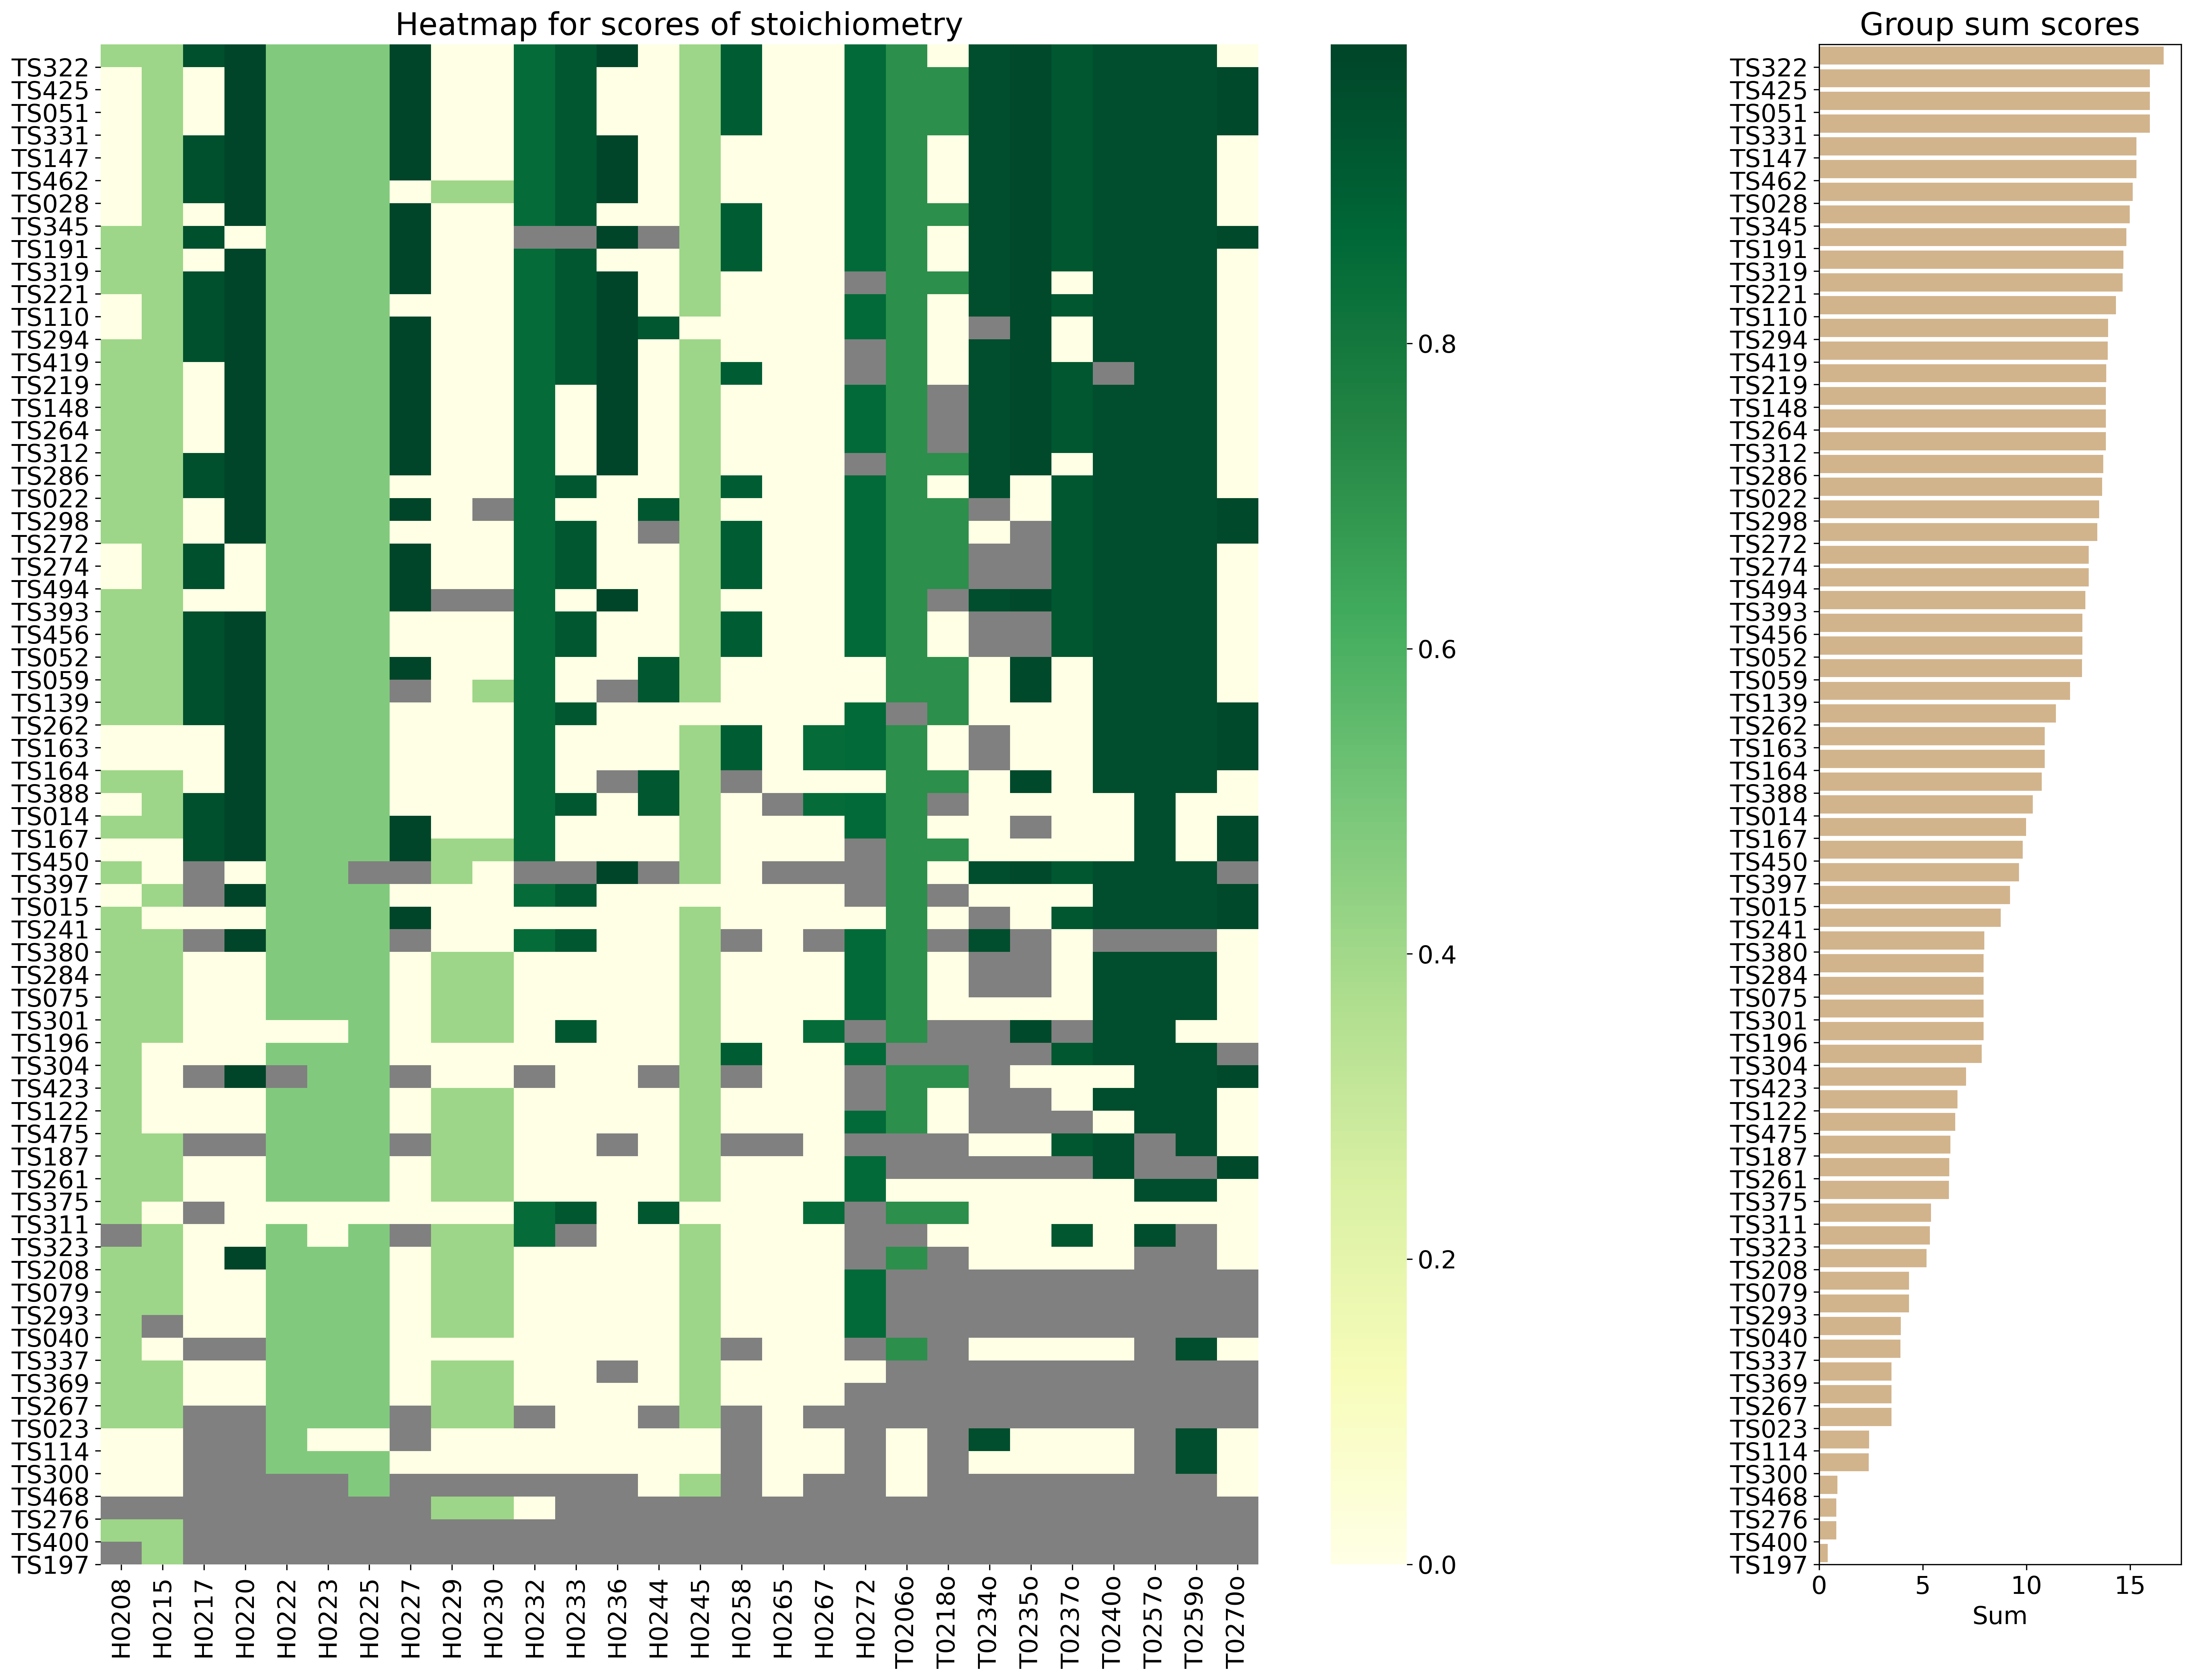

In [103]:
sum = score_df_all.sum(axis=1)
sorted_indices = sum.sort_values(ascending=True).index
sorted_heatmap_data = score_df_all.loc[sorted_indices].reset_index(
    drop=True)
sorted_sum = sum.loc[sorted_indices].reset_index(drop=True)
sorted_mask = pd.DataFrame(
    mask, index=score_df_all.index).loc[sorted_indices].reset_index(drop=True)
# use mask to mask the data. will be used for heatmap
masked_data = sorted_heatmap_data.copy()
masked_data[sorted_mask] = np.nan
# set up the colormap
cmap = plt.cm.YlGn
cmap = ListedColormap(cmap(np.linspace(0, 1, 256)))
cmap.set_bad(color='gray')  # set the masked area to gray
# set up the figure and gridspec
fig = plt.figure(figsize=(24, 18), dpi=300)
gs = GridSpec(1, 2, width_ratios=[4, 1], wspace=0.3)
# plot the heatmap
ax0 = fig.add_subplot(gs[0])
sns.heatmap(masked_data, cmap=cmap, cbar=True, ax=ax0)
ax0.set_yticklabels(
    [f'{i}' for i in sorted_indices], rotation=0)  # use the same order as the row sum
ax0.set_xticklabels(sorted_heatmap_data.columns, rotation=90)
# set x tick font size
ax0.tick_params(axis='x', labelsize=16)
# set y tick font size
ax0.tick_params(axis='y', labelsize=16)
# set the font size of the colorbar
cbar = ax0.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)

ax0.set_title(
    "Heatmap for scores of stoichiometry", fontsize=20)
# plot the row sum
ax1 = fig.add_subplot(gs[1], sharey=ax0)
y_pos = range(len(sorted_sum))
y_pos = [i+0.5 for i in y_pos]  # change the position of the bars
ax1.barh(y_pos, sorted_sum, color='tan')
# ax1.margins(y=0.5)
ax1.set_yticks(range(len(sorted_sum)))
ax1.set_yticklabels(
    [f'{i}' for i in sorted_indices], rotation=0)  # use the same order as the heatmap
# ax1.spines['bottom'].set_position(('outward', 10))  # 将 x 轴向下移动 10 点
# ymin, ymax = ax1.get_ylim()  # 获取当前的 y 轴范围
# ax1.set_ylim(ymin - 1, ymax-1)  # 为最底部条形预留空间
# set x tick font size
ax1.tick_params(axis='x', labelsize=16)
# set y tick font size
ax1.tick_params(axis='y', labelsize=16)
ax1.invert_yaxis()  # flip the y-axis
ax1.set_xlabel("Sum", fontsize=16)
ax1.set_title("Group sum scores", fontsize=20)